### Import relevant packages 

In [52]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import empirica regio data

In [53]:
BASE_DIR = Path("..") / "data" / "output"

df_empirica_regio = pd.read_csv(
    BASE_DIR / "empirica_regio_data.csv",
    encoding="utf-8-sig",
)
df_empirica_regio["Jahr"] = df_empirica_regio["Jahr"].astype(int)

### Markdown

In [54]:
df_empirica_regio

,Regionsebene,RegionID,Regionsname,Jahr,Kaufpreis/m2 ETW 5%,Kaufpreis/m2 ETW 50%,Kaufpreis/m2 ETW 95%,Kaufpreis/m2 EZFH 5%,Kaufpreis/m2 EZFH 50%,Kaufpreis/m2 EZFH 95%,...,Arbeitsvolumen Haushalt,BIP insgesamt,Jahreseinkommen Einwohner,Jahreseinkommen Haushalt,Wohneigentumsquote,Genehmigte Wohnungen,Vermietete Wohnungen,Wohnfläche,Wohnfläche insgesamt,Wohnungen
0,Bundesrepublik,0,Deutschland,2005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.3,NaN,NaN,NaN,NaN,NaN
1,Bundesrepublik,0,Deutschland,2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.4,NaN,NaN,NaN,NaN,NaN
2,Bundesrepublik,0,Deutschland,2007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.5,NaN,NaN,NaN,NaN,NaN
3,Bundesrepublik,0,Deutschland,2008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.5,NaN,NaN,NaN,NaN,NaN
4,Bundesrepublik,0,Deutschland,2009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238997,Gemeinde,16077052,Windischleuba,2020,NaN,NaN,NaN,370.0,1150.0,2129.0,...,NaN,NaN,31043.0,65496.0,63.6,0.0,377.0,50.4,94.8,1036.0
238998,Gemeinde,16077052,Windischleuba,2021,717.0,1031.0,1587.0,NaN,NaN,NaN,...,NaN,NaN,32557.0,68362.0,63.7,1.0,378.0,50.8,95.2,1039.0
238999,Gemeinde,16077052,Windischleuba,2022,959.0,1212.0,1664.0,250.0,1094.0,2563.0,...,NaN,NaN,34063.0,71927.0,63.7,4.0,378.0,51.0,95.6,1040.0
239000,Gemeinde,16077052,Windischleuba,2023,NaN,NaN,NaN,385.0,1445.0,2209.0,...,NaN,NaN,38767.0,80688.0,63.7,0.0,378.0,51.9,95.6,1040.0


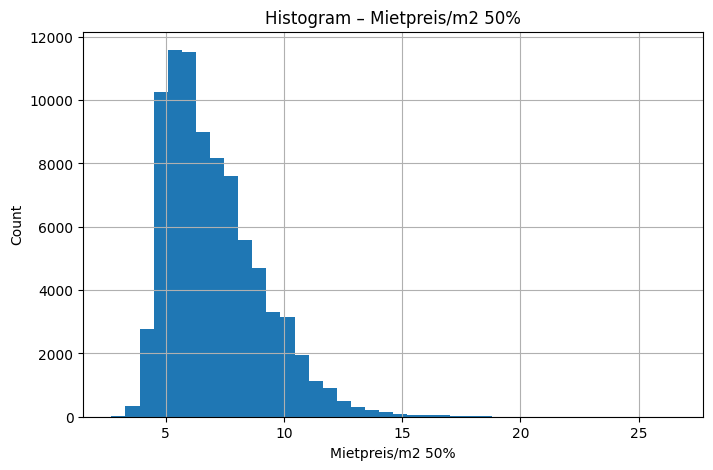

In [55]:
variable = "Mietpreis/m2 50%"

df_empirica_regio[variable].hist(bins=40, figsize=(8,5))
plt.title(f"Histogram – {variable}")
plt.xlabel(variable)
plt.ylabel("Count")
plt.show()


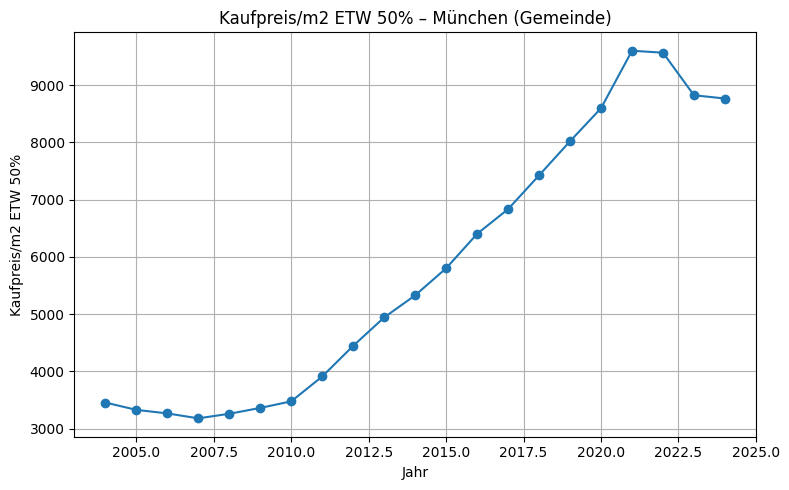

In [56]:
region = "München"
var = "Kaufpreis/m2 ETW 50%" 
mask_region = df_empirica_regio["Regionsname"] == region
mask_level = df_empirica_regio["Regionsebene"] == "Gemeinde"
df_muc = df_empirica_regio[mask_region & mask_level].sort_values("Jahr")

plt.figure(figsize=(8,5))
plt.plot(df_muc["Jahr"], df_muc[var], marker="o")

plt.title(f"{var} – {region} (Gemeinde)")
plt.xlabel("Jahr")
plt.ylabel(var)
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
df_muc

,Regionsebene,RegionID,Regionsname,Jahr,Kaufpreis/m2 ETW 5%,Kaufpreis/m2 ETW 50%,Kaufpreis/m2 ETW 95%,Kaufpreis/m2 EZFH 5%,Kaufpreis/m2 EZFH 50%,Kaufpreis/m2 EZFH 95%,...,Arbeitsvolumen Haushalt,BIP insgesamt,Jahreseinkommen Einwohner,Jahreseinkommen Haushalt,Wohneigentumsquote,Genehmigte Wohnungen,Vermietete Wohnungen,Wohnfläche,Wohnfläche insgesamt,Wohnungen
141247,Gemeinde,9162000,München,2004,1982.0,3454.0,6077.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141248,Gemeinde,9162000,München,2005,1909.0,3326.0,5853.0,NaN,NaN,NaN,...,NaN,NaN,24324.0,43993.0,25.1,8527.0,538849.0,39.9,49827.0,719735.0
141249,Gemeinde,9162000,München,2006,1873.0,3264.0,5743.0,NaN,NaN,NaN,...,NaN,NaN,24413.0,44082.0,25.1,7529.0,549834.0,39.7,50994.0,734385.0
141250,Gemeinde,9162000,München,2007,1824.0,3178.0,5592.0,NaN,NaN,NaN,...,NaN,NaN,24715.0,44696.0,25.1,5271.0,552920.0,39.5,51342.0,738500.0
141251,Gemeinde,9162000,München,2008,1870.0,3258.0,5733.0,NaN,NaN,NaN,...,NaN,NaN,24747.0,44878.0,25.1,5730.0,556278.0,39.3,51712.0,742906.0
141252,Gemeinde,9162000,München,2009,1929.0,3360.0,5913.0,NaN,NaN,NaN,...,NaN,NaN,23936.0,43447.0,25.1,5462.0,559181.0,39.5,52027.0,746550.0
141253,Gemeinde,9162000,München,2010,1995.0,3475.0,6115.0,NaN,NaN,NaN,...,NaN,NaN,24420.0,44613.0,25.1,5402.0,561902.0,39.0,52310.0,750045.0
141254,Gemeinde,9162000,München,2011,2243.0,3909.0,6878.0,NaN,NaN,NaN,...,NaN,NaN,25059.0,46109.0,25.1,9034.0,565954.0,38.7,52813.0,755440.0
141255,Gemeinde,9162000,München,2012,2551.0,4445.0,7822.0,2656.0,4500.0,7939.0,...,NaN,NaN,25958.0,48050.0,25.1,7559.0,569843.0,38.4,53255.0,760549.0
141256,Gemeinde,9162000,München,2013,2944.0,4941.0,8426.0,3232.0,5233.0,9006.0,...,NaN,NaN,26022.0,48365.0,25.1,7199.0,574411.0,38.2,53763.0,766586.0
